#Multi-Class Text Classification with Scikit-Learn
## by Susan Li

https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/learning-stack/Colab-ML-Playbook/blob/master/NLP/Multi-Class%20Text%20Classification%20with%20Scikit-Learn/Consumer_complaints.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/learning-stack/Colab-ML-Playbook/blob/master/NLP/Multi-Class%20Text%20Classification%20with%20Scikit-Learn/Consumer_complaints.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [1]:
!wget https://data.consumerfinance.gov/api/views/s6ew-h6mp/rows.csv?accessType=DOWNLOAD

--2018-12-31 14:59:36--  https://data.consumerfinance.gov/api/views/s6ew-h6mp/rows.csv?accessType=DOWNLOAD
Resolving data.consumerfinance.gov (data.consumerfinance.gov)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.consumerfinance.gov (data.consumerfinance.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [      <=>           ] 644.82M  4.96MB/s    in 90s     

2018-12-31 15:01:09 (7.15 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [676147933]



In [23]:
import pandas as pd
df = pd.read_csv('rows.csv?accessType=DOWNLOAD', nrows=30000)
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,12/31/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,ALLY FINANCIAL INC.,MI,48708,NaN,NaN,Web,12/31/2018,In progress,Yes,NaN,3113150
1,12/29/2018,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"First Financial Resources, Inc.",MA,023XX,NaN,NaN,Web,12/29/2018,Closed with explanation,Yes,NaN,3112037
2,12/29/2018,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,Sequoia Financial Services,CA,90024,NaN,NaN,Web,12/29/2018,Closed with explanation,Yes,NaN,3112413
3,12/28/2018,Checking or savings account,CD (Certificate of Deposit),Managing an account,Deposits or withdrawals,NaN,NaN,ALLY FINANCIAL INC.,NY,10024,NaN,NaN,Referral,12/28/2018,In progress,Yes,NaN,3111837
4,12/28/2018,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company believes it acted appropriately as aut...,"Sequium Asset Solutions, LLC",TN,38111,NaN,Consent not provided,Web,12/28/2018,Closed with explanation,Yes,NaN,3111333


In [0]:
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5131 entries, 285 to 29997
Data columns (total 18 columns):
Date received                   5131 non-null object
Product                         5131 non-null object
Sub-product                     5131 non-null object
Issue                           5131 non-null object
Sub-issue                       4541 non-null object
Consumer complaint narrative    5131 non-null object
Company public response         5131 non-null object
Company                         5131 non-null object
State                           5101 non-null object
ZIP code                        3977 non-null object
Tags                            850 non-null object
Consumer consent provided?      5131 non-null object
Submitted via                   5131 non-null object
Date sent to company            5131 non-null object
Company response to consumer    5131 non-null object
Timely response?                5131 non-null object
Consumer disputed?              0 non-null 

In [0]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]

In [27]:
df.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [0]:
df.columns = ['Product', 'Consumer_complaint_narrative']

For this project, we need only two columns — “Product” and “Consumer complaint narrative”.

**Input**: Consumer_complaint_narrative

Example: “ I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements”

**Output**: product

Example: Credit reporting

We will remove missing values in “Consumer complaints narrative” column, and add a column encoding the product as an integer because categorical variables are often better represented by integers than strings.

We also create a couple of dictionaries for future use.

After cleaning up, this is the first five rows of the data we will be working on:

In [0]:
df['category_id'] = df['Product'].factorize()[0]
from io import StringIO
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [30]:
df.head()

,Product,Consumer_complaint_narrative,category_id
285,"Credit reporting, credit repair services, or o...",All dates on accounts are almost showing prese...,0
304,Debt collection,I am beyond exhausted with all my efforts to r...,1
408,Debt collection,"I checked my credit, but I never got any notif...",1
413,"Credit reporting, credit repair services, or o...",I would like to request a security freeze plac...,0
414,Debt collection,In XX/XX/XXXX LJ Ross Associates began contact...,1


## Imbalanced Classes
We see that the number of complaints per product is imbalanced. Consumers’ complaints are more biased towards Debt collection, Credit reporting and Mortgage.

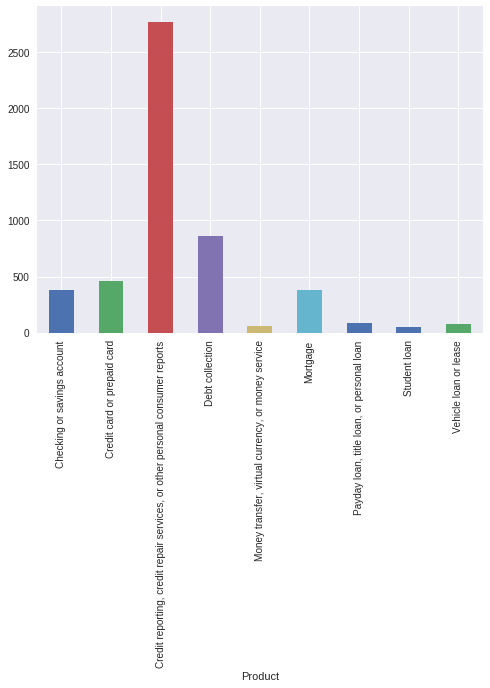

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

When we encounter such problems, we are bound to have difficulties solving them with standard algorithms. Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In the worst case, minority classes are treated as outliers and ignored. For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.

However, in our case of learning imbalanced data, the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is.

## Text Representation
The classifiers and learning algorithms can not directly process the text documents in their original form, as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length. Therefore, during the preprocessing step, the texts are converted to a more manageable representation.

One common approach for extracting features from text is to use the bag of words model: a model where for each document, a complaint narrative in our case, the presence (and often the frequency) of words is taken into consideration, but the order in which they occur is ignored.

Specifically, for each term in our dataset, we will calculate a measure called Term Frequency, Inverse Document Frequency, abbreviated to tf-idf. We will use sklearn.feature_extraction.text.TfidfVectorizer to calculate a tf-idf vector for each of consumer complaint narratives:

* *sublinear_df* is set to *True* to use a logarithmic form for frequency.
* *min_df* is the minimum numbers of documents a word must be present in to be kept.
* *norm* is set to *l2*, to ensure all our feature vectors have a euclidian norm of 1.
* *ngram_range* is set to* (1, 2)* to indicate that we want to consider both unigrams and bigrams.
* *stop_words* is set to "*english*" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(5131, 14304)

Now, each of 5131 consumer complaint narratives is represented by 14304 features, representing the tf-idf score for different unigrams and bigrams.

We can use *sklearn.feature_selection.chi2* to find the terms that are the most correlated with each of the products:

In [33]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Checking or savings account':
  . Most correlated unigrams:
       . deposit
       . bonus
  . Most correlated bigrams:
       . savings account
       . checking account
# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . citi
       . card
  . Most correlated bigrams:
       . believe payments
       . credit card
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
       . report
       . transunion
  . Most correlated bigrams:
       . report understanding
       . appear report
# 'Debt collection':
  . Most correlated unigrams:
       . collection
       . debt
  . Most correlated bigrams:
       . anguish slandering
       . collect debt
# 'Money transfer, virtual currency, or money service':
  . Most correlated unigrams:
       . wire
       . tickets
  . Most correlated bigrams:
       . wire transfer
       . bank wells
# 'Mortgage':
  . Most correlated unigrams:
       . escrow
       . mortga

## Multi-Class Classifier: Features and Design
* To train supervised classifiers, we first transformed the “Consumer complaint narrative” into a vector of numbers. We explored vector representations such as TF-IDF weighted vectors.
* After having this vector representations of the text we can train supervised classifiers to train unseen “Consumer complaint narrative” and predict the “product” on which they fall.

After all the above data transformation, now that we have all the features and labels, it is time to train the classifiers. There are a number of algorithms we can use for this type of problem.

Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant:

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [0]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

In [0]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

In [0]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

In [0]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [0]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [0]:
cv_df.groupby('model_name').accuracy.mean()

In [0]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [0]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

In [0]:
model.fit(features, labels)

In [0]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

In [0]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Product'].unique()))